In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')

In [3]:
df.shape

(61900, 12)

In [4]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [5]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [6]:
#Tipos de datos
df.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object

In [7]:
df = df.drop(columns=['geoId','countryterritoryCode','dateRep','year','day','month'])
df

,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,746,6,Afghanistan,38041757.0,Asia,9.013779
1,298,9,Afghanistan,38041757.0,Asia,7.052776
2,113,11,Afghanistan,38041757.0,Asia,6.868768
3,63,10,Afghanistan,38041757.0,Asia,7.134266
4,202,16,Afghanistan,38041757.0,Asia,6.968658
...,...,...,...,...,...,...
61895,0,0,Zimbabwe,14645473.0,Africa,NaN
61896,0,1,Zimbabwe,14645473.0,Africa,NaN
61897,0,0,Zimbabwe,14645473.0,Africa,NaN
61898,1,0,Zimbabwe,14645473.0,Africa,NaN


In [8]:
df["continentExp"] = df["continentExp"].astype('category').cat.codes

In [9]:
df = df.dropna()
df

,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,746,6,Afghanistan,38041757.0,2,9.013779
1,298,9,Afghanistan,38041757.0,2,7.052776
2,113,11,Afghanistan,38041757.0,2,6.868768
3,63,10,Afghanistan,38041757.0,2,7.134266
4,202,16,Afghanistan,38041757.0,2,6.968658
...,...,...,...,...,...,...
61882,0,0,Zimbabwe,14645473.0,0,0.047796
61883,0,0,Zimbabwe,14645473.0,0,0.047796
61884,0,0,Zimbabwe,14645473.0,0,0.047796
61885,1,0,Zimbabwe,14645473.0,0,0.054624


<AxesSubplot:ylabel='Frequency'>

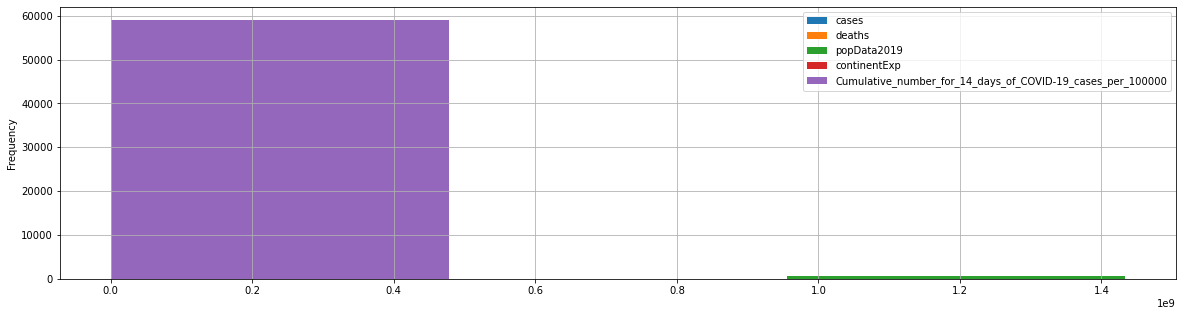

In [10]:
df.plot.hist(bins=3,figsize=(20,5),grid=True)

<AxesSubplot:>

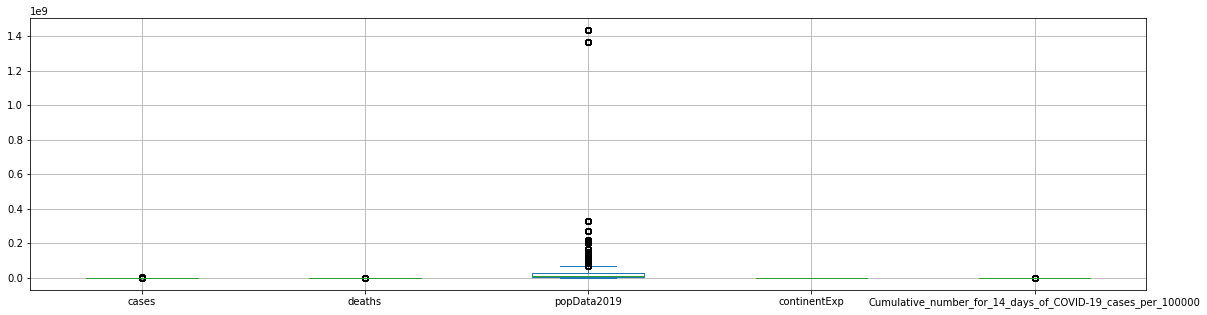

In [11]:
df.plot.box(figsize=(20,5),grid=True)

In [12]:
df2 = pd.read_csv("data_water.csv")
df2

,Unnamed: 0,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2019,2019.1,2019.2,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
0,NaN,Population using at least basic drinking-water...,Population using at least basic drinking-water...,Population using at least basic drinking-water...,Population using safely managed drinking-water...,Population using safely managed drinking-water...,Population using safely managed drinking-water...,Population using at least basic drinking-water...,Population using at least basic drinking-water...,Population using at least basic drinking-water...,...,Population using at least basic drinking-water...,Population using safely managed drinking-water...,Population using safely managed drinking-water...,Population using safely managed drinking-water...,Population using at least basic drinking-water...,Population using at least basic drinking-water...,Population using at least basic drinking-water...,Population using safely managed drinking-water...,Population using safely managed drinking-water...,Population using safely managed drinking-water...
1,Country,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,...,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural
2,Afghanistan,75,100,66,28,36,24,72,98,64,...,21,11,21,8,28,52,21,11,21,8
3,Albania,95,96,94,71,NaN,NaN,95,96,93,...,81,49,NaN,NaN,87,96,80,49,NaN,NaN
4,Algeria,94,96,90,72,74,69,94,96,90,...,84,71,82,53,90,94,83,70,82,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Venezuela (Bolivarian Republic of),94,NaN,NaN,NaN,NaN,NaN,94,NaN,NaN,...,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN
194,Viet Nam,97,99,96,NaN,NaN,NaN,96,99,95,...,77,NaN,NaN,NaN,81,95,76,NaN,NaN,NaN
195,Yemen,61,77,51,NaN,NaN,NaN,60,77,50,...,29,NaN,NaN,NaN,41,74,29,NaN,NaN,NaN
196,Zambia,65,87,48,NaN,50,NaN,65,87,47,...,30,NaN,45,NaN,48,83,29,NaN,44,NaN


In [13]:
df2 = df2[['Unnamed: 0','2020.3']]
df2

,Unnamed: 0,2020.3
0,NaN,Population using safely managed drinking-water...
1,Country,Total
2,Afghanistan,28
3,Albania,71
4,Algeria,72
...,...,...
193,Venezuela (Bolivarian Republic of),NaN
194,Viet Nam,NaN
195,Yemen,NaN
196,Zambia,NaN


In [14]:
df2 = df2.replace(np.nan, 0)
df2

,Unnamed: 0,2020.3
0,0,Population using safely managed drinking-water...
1,Country,Total
2,Afghanistan,28
3,Albania,71
4,Algeria,72
...,...,...
193,Venezuela (Bolivarian Republic of),0
194,Viet Nam,0
195,Yemen,0
196,Zambia,0


In [15]:
df2 = df2.iloc[2: , :]
df2

,Unnamed: 0,2020.3
2,Afghanistan,28
3,Albania,71
4,Algeria,72
5,Andorra,91
6,Angola,0
...,...,...
193,Venezuela (Bolivarian Republic of),0
194,Viet Nam,0
195,Yemen,0
196,Zambia,0


In [16]:
df2.dtypes

Unnamed: 0    object
2020.3        object
dtype: object

In [17]:
df2 = df2.rename(columns={'Unnamed: 0': 'Pais','2020.3': 'Total2020'})
df2

,Pais,Total2020
2,Afghanistan,28
3,Albania,71
4,Algeria,72
5,Andorra,91
6,Angola,0
...,...,...
193,Venezuela (Bolivarian Republic of),0
194,Viet Nam,0
195,Yemen,0
196,Zambia,0


In [18]:
df2['Total2020'] = df2['Total2020'].astype(int)
#Transformar laa columnas Country y countriesAndTerritories a string
df2['Pais'] = df2['Pais'].astype(str)
df['countriesAndTerritories'] = df['countriesAndTerritories'].astype(str)

<AxesSubplot:ylabel='Frequency'>

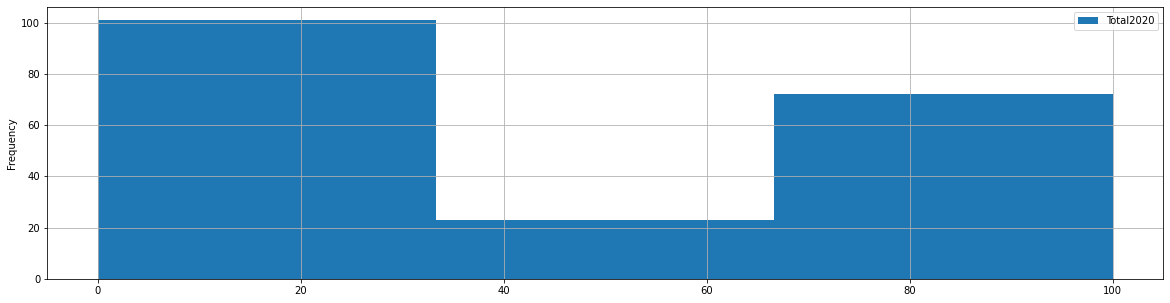

In [19]:
df2.plot.hist(bins=3,figsize=(20,5),grid=True)

In [20]:
classes = []
for y in df2['Total2020']:
    if y >= 0 and y <=35:
        classes.append(0)
    elif  y >= 36 and y <=65:
        classes.append(1)
    else:
        classes.append(2)

In [21]:
df2['classes'] = classes
df2.head()

,Pais,Total2020,classes
2,Afghanistan,28,0
3,Albania,71,2
4,Algeria,72,2
5,Andorra,91,2
6,Angola,0,0


In [22]:
valores = []
for d in df['countriesAndTerritories']:
    if d in df2['Pais'].values:
        valores.append(df2[df2['Pais']==d].values[0][1:])
    else:
        valores.append([0,0])

In [23]:
df3 = pd.DataFrame(valores,columns=['Total2020','classes'])
df['Porcentaje'] = df3['Total2020']
df['classes'] = df3['classes']

In [24]:
df

,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Porcentaje,classes
0,746,6,Afghanistan,38041757.0,2,9.013779,28.0,0.0
1,298,9,Afghanistan,38041757.0,2,7.052776,28.0,0.0
2,113,11,Afghanistan,38041757.0,2,6.868768,28.0,0.0
3,63,10,Afghanistan,38041757.0,2,7.134266,28.0,0.0
4,202,16,Afghanistan,38041757.0,2,6.968658,28.0,0.0
...,...,...,...,...,...,...,...,...
61882,0,0,Zimbabwe,14645473.0,0,0.047796,NaN,NaN
61883,0,0,Zimbabwe,14645473.0,0,0.047796,NaN,NaN
61884,0,0,Zimbabwe,14645473.0,0,0.047796,NaN,NaN
61885,1,0,Zimbabwe,14645473.0,0,0.054624,NaN,NaN


In [25]:
df = df.replace(np.nan, 0)
df

,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Porcentaje,classes
0,746,6,Afghanistan,38041757.0,2,9.013779,28.0,0.0
1,298,9,Afghanistan,38041757.0,2,7.052776,28.0,0.0
2,113,11,Afghanistan,38041757.0,2,6.868768,28.0,0.0
3,63,10,Afghanistan,38041757.0,2,7.134266,28.0,0.0
4,202,16,Afghanistan,38041757.0,2,6.968658,28.0,0.0
...,...,...,...,...,...,...,...,...
61882,0,0,Zimbabwe,14645473.0,0,0.047796,0.0,0.0
61883,0,0,Zimbabwe,14645473.0,0,0.047796,0.0,0.0
61884,0,0,Zimbabwe,14645473.0,0,0.047796,0.0,0.0
61885,1,0,Zimbabwe,14645473.0,0,0.054624,0.0,0.0


In [26]:
y = df['classes']
X = df.drop(columns=['classes'])


In [27]:
X["countriesAndTerritories"] = X["countriesAndTerritories"].astype('category').cat.codes
X.head()

,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Porcentaje
0,746,6,0,38041757.0,2,9.013779,28.0
1,298,9,0,38041757.0,2,7.052776,28.0
2,113,11,0,38041757.0,2,6.868768,28.0
3,63,10,0,38041757.0,2,7.134266,28.0
4,202,16,0,38041757.0,2,6.968658,28.0


In [28]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
print(X_scaler)

[[-0.06706838 -0.15881728 -1.71617892 ...  0.28128385 -0.35303124
  -0.10455755]
 [-0.13164349 -0.13647255 -1.71617892 ...  0.28128385 -0.36511174
  -0.10455755]
 [-0.15830955 -0.12157606 -1.71617892 ...  0.28128385 -0.3662453
  -0.10455755]
 ...
 [-0.17459747 -0.20350674  1.74893428 ... -1.34760685 -0.40826502
  -0.77895687]
 [-0.17445333 -0.20350674  1.74893428 ... -1.34760685 -0.40822296
  -0.77895687]
 [-0.17459747 -0.20350674  1.74893428 ... -1.34760685 -0.40822296
  -0.77895687]]


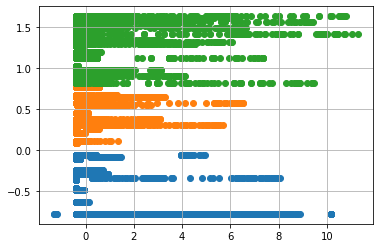

In [29]:
#Grupos de relación entre el casos acumulados de covid y el porcentaje de sanidad
from matplotlib import pyplot
for class_value in range(3):
    row_ix = np.where(y.values == class_value) # obtenemos los índices de fila para las muestras dentro de es ta clase
    pyplot.scatter(X_scaler[row_ix, 5], X_scaler[row_ix, 6])
plt.grid()
pyplot.show()

### from matplotlib import pyplot
for class_value in range(3):
    row_ix = np.where(y.values == class_value) # obtenemos los índices de fila para las muestras dentro de esta clase
    pyplot.scatter(X_scaler[row_ix, 5], X_scaler[row_ix, 6])
plt.grid()
pyplot.show()

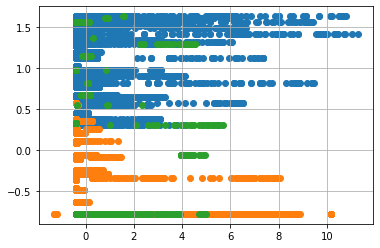

In [30]:
model = KMeans(n_clusters=3)
# ajustamos el modelo
model.fit(X_scaler)
# asignamos un cluster a cada ejemplo 
yhat = model.predict(X_scaler)
# obtenemos los clústers únicos
clusters = np.unique(yhat)
# creamos un gráfico de dispersión para las muestras de cada clú ster
for cluster in clusters:
    row_ix = np.where(yhat == cluster) # obtenemos los índices de fila para las muestras dentro de es te clúster
    pyplot.scatter(X_scaler[row_ix, 5], X_scaler[row_ix, 6]) # creamos un mapa de dispersión para estas muestras
# mostramos el gráfico
pyplot.grid()
pyplot.show()

In [33]:
import tensorflow as tf
from keras import *
from sklearn.model_selection import train_test_split 

In [34]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_scaler, y.astype(int), test_size=0.20, random_state=1, shuffle=True)

In [35]:
Y_train

55611    0
50091    0
48863    2
38151    0
28025    2
        ..
52435    0
34070    0
5413     2
12795    0
34575    2
Name: classes, Length: 47216, dtype: int32

In [36]:
model = Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train[0])]), #entrada
    layers.Dense(32, activation='relu'), #intermedia
    layers.Dense(1,activation='sigmoid')]) #salid de la familia sigmoide
model.compile(loss='binary_crossentropy',optimizer='ADAM',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train, Y_train.values, epochs=10,validation_split = 0.2)

Epoch 1/10
1181/1181 [==============================] - 3s 2ms/step - loss: -1790.8589 - accuracy: 0.6298 - val_loss: -7337.8018 - val_accuracy: 0.6310
Epoch 2/10
1181/1181 [==============================] - 3s 2ms/step - loss: -23649.6738 - accuracy: 0.6364 - val_loss: -48636.2344 - val_accuracy: 0.6203
Epoch 3/10
1181/1181 [==============================] - 3s 2ms/step - loss: -86173.2812 - accuracy: 0.6358 - val_loss: -137519.1562 - val_accuracy: 0.6330
Epoch 4/10
1181/1181 [==============================] - 3s 2ms/step - loss: -198075.7031 - accuracy: 0.6369 - val_loss: -280464.2812 - val_accuracy: 0.6332
Epoch 5/10
1181/1181 [==============================] - 3s 2ms/step - loss: -365290.8125 - accuracy: 0.6372 - val_loss: -483779.3750 - val_accuracy: 0.6324
Epoch 6/10
1181/1181 [==============================] - 3s 2ms/step - loss: -595310.4375 - accuracy: 0.6369 - val_loss: -755888.8750 - val_accuracy: 0.6254
Epoch 7/10
1181/1181 [==============================] - 2s 2ms/step - l

In [38]:
y_pred_dnn = np.ceil(model.predict(X_validation).flatten())
#Transformar a entero las predicciones
y_pred_dnn_int = [abs(y) for y in y_pred_dnn]

In [39]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report 
print(classification_report(y_pred_dnn,Y_validation))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      6479
         1.0       1.00      0.18      0.30      5326
         2.0       0.00      0.00      0.00         0

    accuracy                           0.63     11805
   macro avg       0.62      0.39      0.41     11805
weighted avg       0.93      0.63      0.65     11805

